In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import ptitprince as pt
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\ASUS TUF GAMING\Desktop\SEBA\master\data science\portfolio\TEF Fraud detection\pipeline para generar datos sintéticos TEF\dataset_final.csv")

print("\n====VISION GLOBAL DEL DATASET====")
print(f"Dataset shape: {data.shape}")

# mostrar información basica del dataset
print("\n====DATA INFO====")
data.info()

# Presentar un resumen de las estadísticas del dataset
print("\n====ESTATISTICAS DEL DATASET====")
print(data.describe().T)

# Chequear valores faltantes
print("\n====DATOS FALTANTES EN EL DATASET====")
missing_data = data.isnull().sum()
missing_data_pc = (missing_data / len(data)) * 100
missing_data_summary= pd.DataFrame({"Missing_count": missing_data,
                                    "Missing_percent": missing_data_pc})
print(missing_data_summary[missing_data_summary["Missing_count"] > 0].sort_values("Missing_count", ascending = False))


====VISION GLOBAL DEL DATASET====
Dataset shape: (94593, 36)

====DATA INFO====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94593 entries, 0 to 94592
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     94593 non-null  object 
 1   timestamp                          94593 non-null  object 
 2   sender_id                          94593 non-null  object 
 3   receiver_id                        94593 non-null  object 
 4   amount                             94593 non-null  float64
 5   currency                           94593 non-null  object 
 6   transaction_type                   94593 non-null  object 
 7   sender_bank                        94593 non-null  object 
 8   sender_balance_before              94593 non-null  float64
 9   sender_balance_after               94593 non-null  float64
 10  receiver_balance_before            94

In [6]:
 ## Analisis del la característica target (is_fraud)
print("\n====ANALISIS DE LA CARACTERISTICA 'IS_FRAUD'====")
print(f"is_fraud min: {data['is_fraud'].min()}")
print(f"is_fraud max: {data['is_fraud'].max()}")
print(f"is_fraud mean: {data['is_fraud'].mean():.2f}")
print(f"is_fraud median: {data['is_fraud'].median():.2f}")
print(f"is_fraud skewness: {data['is_fraud'].skew():.2f}")
print(f"is_fraud kurtosis: {data['is_fraud'].kurtosis():.2f}")



====ANALISIS DE LA CARACTERISTICA 'IS_FRAUD'====
is_fraud min: 0
is_fraud max: 1
is_fraud mean: 0.02
is_fraud median: 0.00
is_fraud skewness: 6.52
is_fraud kurtosis: 40.48


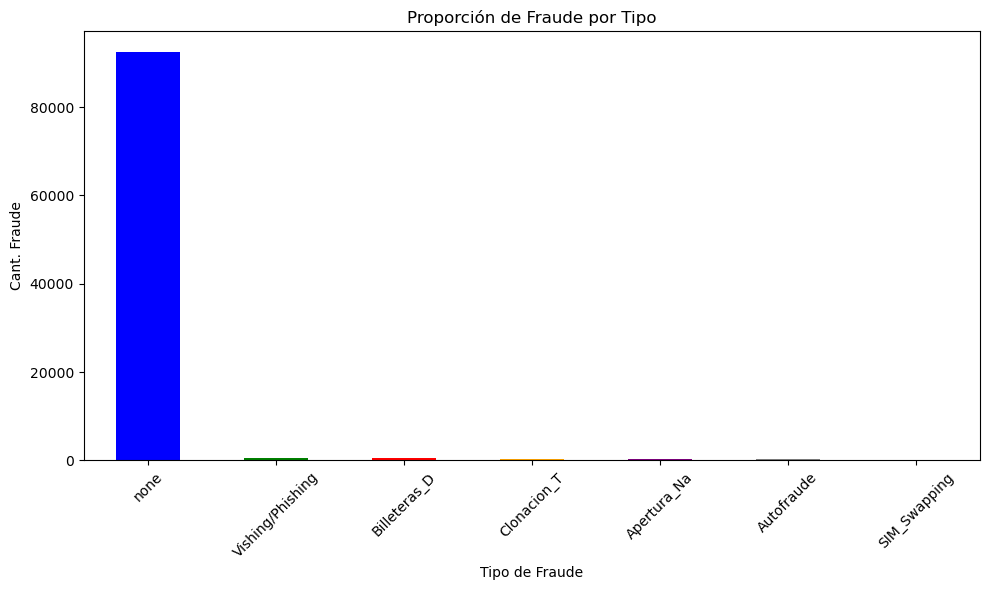

In [7]:

# Agruparmos por tipo de fraude ('fraud_type') y calculamos el conteo por cada grupo
fraud_count = data['fraud_type'].value_counts()

# Crear un gráfico de barras para visualizar la proporcion de cada tipo de fraude
plt.figure(figsize=(10, 6))
fraud_count.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'gray', 'black'])
plt.title('Proporción de Fraude por Tipo')
plt.xlabel('Tipo de Fraude')
plt.ylabel('Cant. Fraude')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

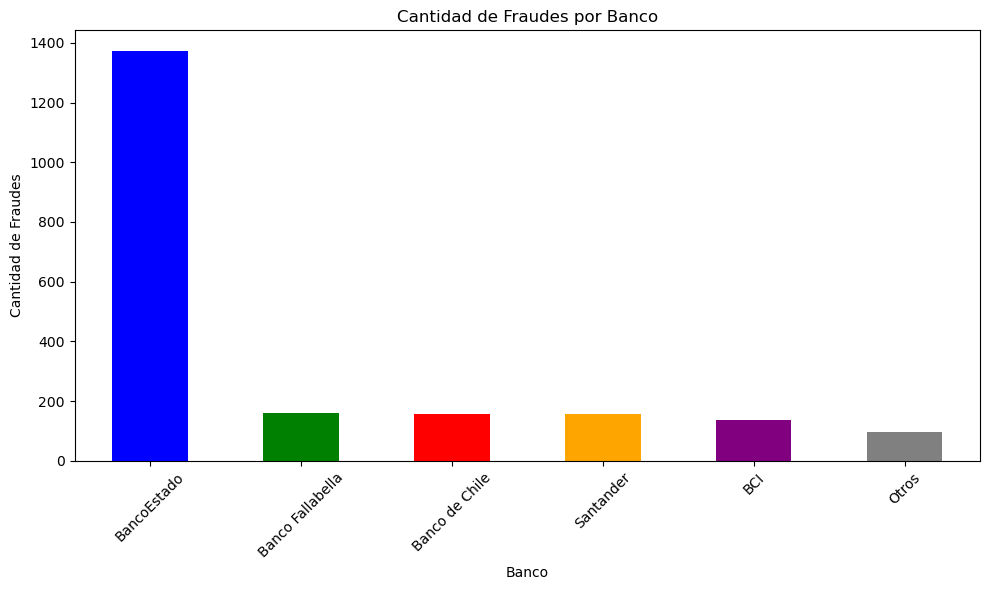

In [14]:
# Filtrar solo los registros donde 'is_fraud' sea 1 y contar por 'sender_bank'
fraud_count = data[data['is_fraud'] == 1]['sender_bank'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
fraud_count.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'gray', 'black'])
plt.title('Cantidad de Fraudes por Banco')
plt.xlabel('Banco')
plt.ylabel('Cantidad de Fraudes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

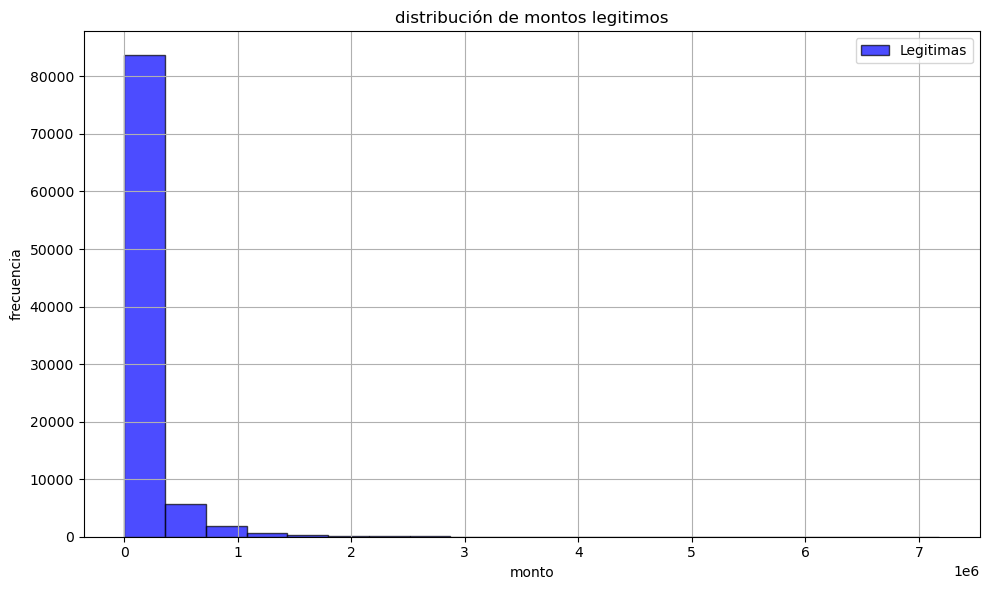

In [15]:
# filtramos el dataset para transacciones legítimas
legitimate_transactions = data[data['is_fraud'] == 0]

# histograma para transacciones legítimas
plt.figure(figsize=(10, 6))
legitimate_amount_hist = legitimate_transactions['amount'].hist(bins=20, alpha=0.7, color = 'blue', edgecolor = 'black')
legitimate_amount_hist.set_title('distribución de montos legitimos')
legitimate_amount_hist.set_xlabel('monto')
legitimate_amount_hist.set_ylabel('frecuencia')

# agregamos una leyenda al gráfico
plt.legend(['Legitimas'])

#mostrar gráfico
plt.tight_layout()
plt.show()

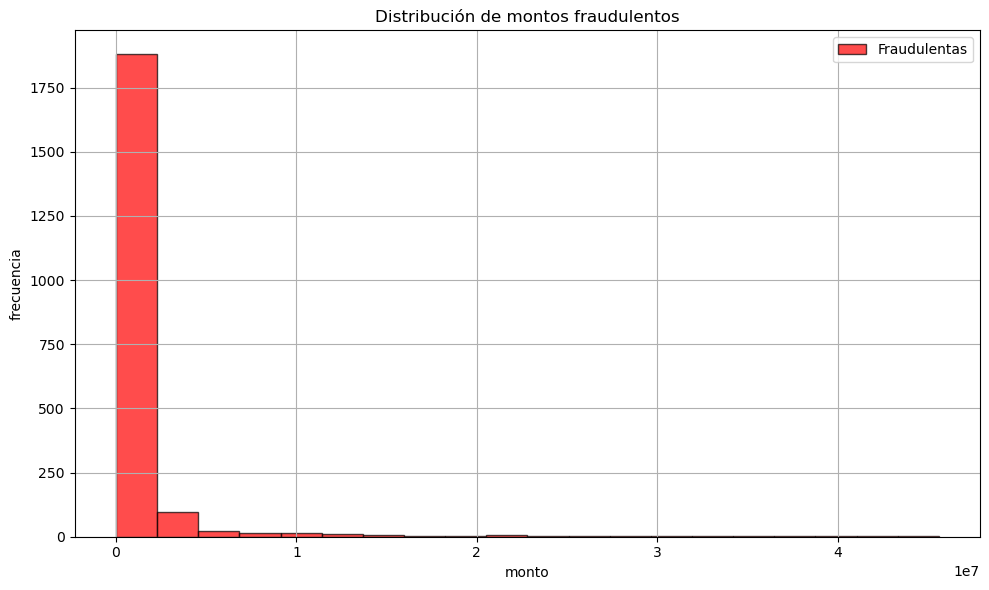

In [16]:
# filtramos el dataset para transacciones fraudulentas
fraud_transactions = data[data['is_fraud'] == 1]

# histograma para transacciones fraudulentas
plt.figure(figsize=(10, 6))


fraud_amount_hist = fraud_transactions['amount'].hist(bins=20, alpha = 0.7, color = 'red', edgecolor= 'black')
fraud_amount_hist.set_title('Distribución de montos fraudulentos')
fraud_amount_hist.set_xlabel('monto')
fraud_amount_hist.set_ylabel('frecuencia')

# agregamos una leyenda al gráfico
plt.legend(['Fraudulentas'])

#mostramos el gráfico
plt.tight_layout()
plt.show()

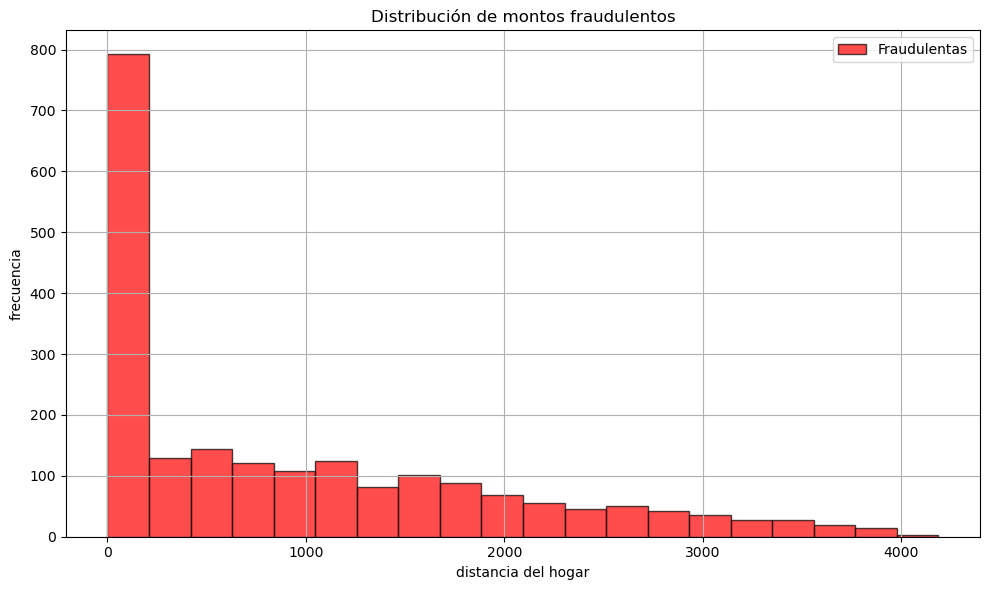

In [17]:
# creamos un gráfico para transacciones fraudulentas y su distancia del lugar habitual de transacción
plt.figure(figsize=(10, 6))

# Histograma para transacciones fraudulentas por distancia del hogar
fraud_amount_hist = fraud_transactions['distance_from_home'].hist(bins=20, alpha = 0.7, color = 'red', edgecolor= 'black')
fraud_amount_hist.set_title('Distribución de montos fraudulentos')
fraud_amount_hist.set_xlabel('distancia del hogar')
fraud_amount_hist.set_ylabel('frecuencia')

# agregamos una leyenda al gráfico
plt.legend(['Fraudulentas'])

#mostramos el gráfico
plt.tight_layout()
plt.show()

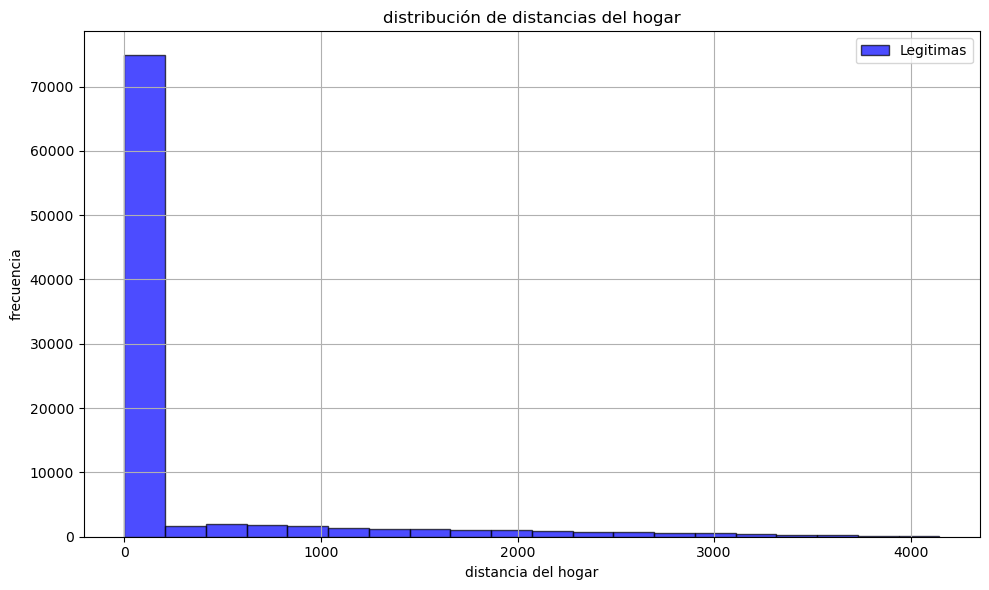

In [18]:

# histograma para transacciones legitimas y su distancia del lugar habitual de transacción
plt.figure(figsize=(10, 6))

legitimate_amount_hist = legitimate_transactions['distance_from_home'].hist(bins=20, alpha=0.7, color = 'blue', edgecolor = 'black')
legitimate_amount_hist.set_title('distribución de distancias del hogar')
legitimate_amount_hist.set_xlabel('distancia del hogar')
legitimate_amount_hist.set_ylabel('frecuencia')

# agregamos una leyenda al gráfico
plt.legend(['Legitimas'])

#mostramos el gráfico
plt.tight_layout()
plt.show()

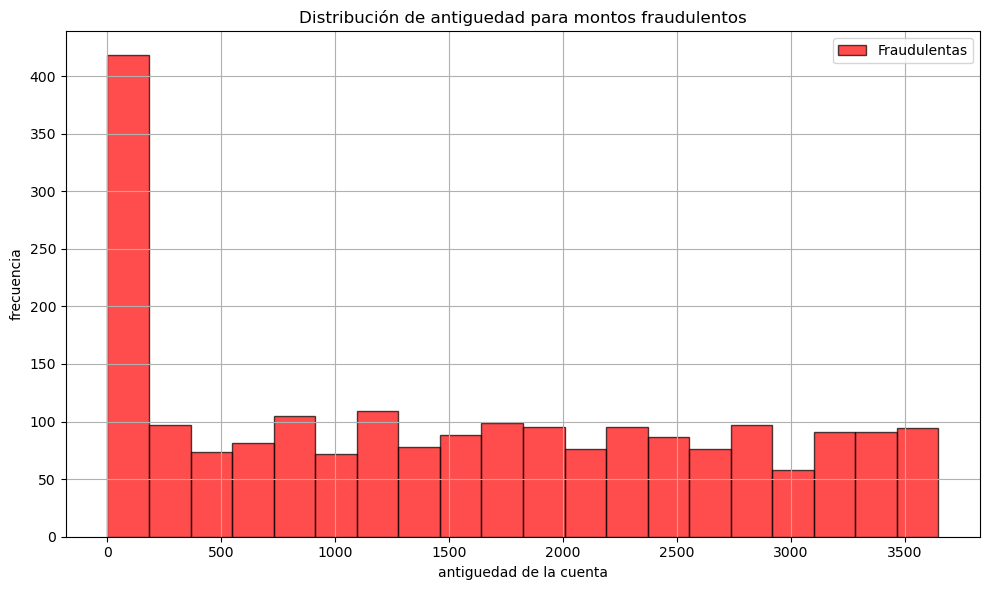

In [19]:
# creamos la instancia para el histograma
plt.figure(figsize=(10, 6))

# histograma para transacciones fraudulentas y su distancia del lugar habitual de transacción
fraud_amount_hist = fraud_transactions['sender_account_age'].hist(bins=20, alpha = 0.7, color = 'red', edgecolor= 'black')
fraud_amount_hist.set_title('Distribución de antiguedad para montos fraudulentos')
fraud_amount_hist.set_xlabel('antiguedad de la cuenta')
fraud_amount_hist.set_ylabel('frecuencia')

# agregamos una leyenda al gráfico
plt.legend(['Fraudulentas'])

#mostramos el gráfico
plt.tight_layout()
plt.show()

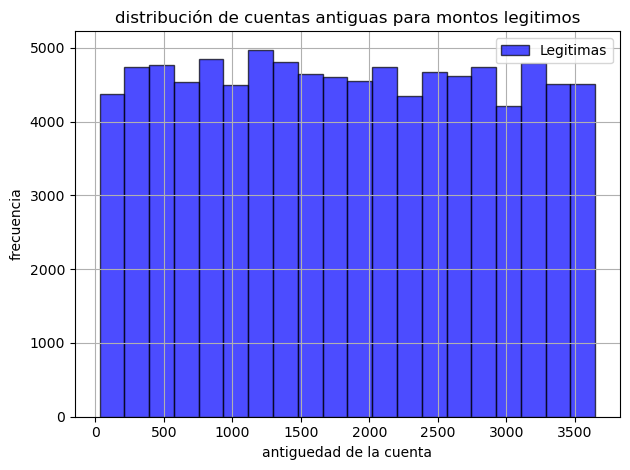

In [20]:
# histograma para transacciones legítimas y su relación con la antiguedad de las cuentas

legitimate_amount_hist = legitimate_transactions['sender_account_age'].hist(bins=20, alpha=0.7, color = 'blue', edgecolor = 'black')
legitimate_amount_hist.set_title('distribución de cuentas antiguas para montos legitimos')
legitimate_amount_hist.set_xlabel('antiguedad de la cuenta')
legitimate_amount_hist.set_ylabel('frecuencia')

# agregamos una leyenda al gráfico
plt.legend(['Legitimas'])

#dmostramos el gráfico
plt.tight_layout()
plt.show()

In [21]:
# Análisis de correlación
print("\n=====ANALISIS DE CORRELACION =====")
# Seleccionamos solo variables categóricas
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# armamos un top de las características más correlacionadas con 'is_fraud'
is_fraud_correlation = (correlation_matrix['is_fraud']).sort_values(ascending=False)
print("\nTop 10 características positivamente correlacionadas con is_fraud:")
print(is_fraud_correlation[1:11])  # Exclude is_fraud itself

print("\nTop 5 características negativamente correlacionadas con is_fraud:")
print(is_fraud_correlation.tail(5))


=====ANALISIS DE CORRELACION =====

Top 10 características positivamente correlacionadas con is_fraud:
receiver_balance_delta    0.220093
amount                    0.216789
sender_balance_delta      0.155574
distance_from_home        0.130424
amount_vs_avg             0.126228
sender_location_lat       0.006435
receiver_location_lon     0.003143
last_24h_count            0.001266
receiver_balance_after    0.000837
sender_location_lon      -0.000178
Name: is_fraud, dtype: float64

Top 5 características negativamente correlacionadas con is_fraud:
time_since_last_transaction   -0.020063
sender_balance_before         -0.033834
sender_account_age            -0.042233
receiver_balance_before       -0.044750
sender_balance_after          -0.049765
Name: is_fraud, dtype: float64
